# Project: Investigating a movie dataset from The Movie Database (TMDb) by Subaru Goto

## table of contents
<ul>
    <li><a href="#intro"> Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
<ul/>

<a id = 'intro'></a>
## Introduction

>The Movie Database (TMBd) is a movie and TV database which offers information such as user ratings (popularity, user votes), budget, revenue, title, cast, duration, genres and release dates. All data is added by the TMBd community. For more information, <a href="https://www.themoviedb.org/">please visit their official website </a>.<p></p>
The data set used in this analysis contains about 10,000 movies.
<p></p>

#### Research Questions

><ol>
    <li>Are there any differences in popularity over time?</li>
    <li>Are high budget movies popular?</li>
    <li>What are the most popular, expensive, revenue-generating and profitable movies?</li>
    <li>What kind of movie genres are popular?</li>
</ol>

In [225]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')


<a id='wrangling'></a>
## Data Wrangling
>First, I loaded thedata set and checked it’s quality. Where necessary, the data was cleaned.
### General Properties

In [226]:
#load csv dataset
df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### variable explaination
<ul>
    <li>id,imbd_id: identification number for movies</li>
    <li>popularity: popularity of movie, the higher the score, the more popular it is</li>
    <li>budget: cost to create the movie</li>
    <li>revenue: how much revenue a movie generated</li>
    <li>original_title: movie title</li>
    <li>cast: actors and actresses who played in the movie</li>
    <li>homepage: homepage of the movie</li>
    <li>director: name of the movie’s director</li>
    <li>tagline: tag line for the movie</li>
    <li>keywords: descriptive keywords for the movie</li>
    <li>overview: short explanation of the movie’s storyline</li>
    <li>runtime: length of movie in minutes</li>
    <li>genres: movie genre</li>
    <li>production_companies: name of the production company </li>
    <li>release_date: release date of the movie</li>
    <li>vote_count: total number of votes (rating) from users</li>
    <li>vote_average: average movie rating</li>
    <li>release_year: year of movie release</li>
    <li>budget_adj: budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
    <li>revenue_adj: revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
    
</ul>  

In [227]:
#check data shape (num row, num column)
df.shape

(10866, 21)

In [228]:
#check summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>There are 10866 movies with 21 variables. More than 50% of movies are rated below popularity average. As can be seen from the above summary statistics there are 0 values in budget, revenue, runtime, budget_adj and revenue_adj. The column labels seem to be clean.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B19785080>,
      dtype=object)

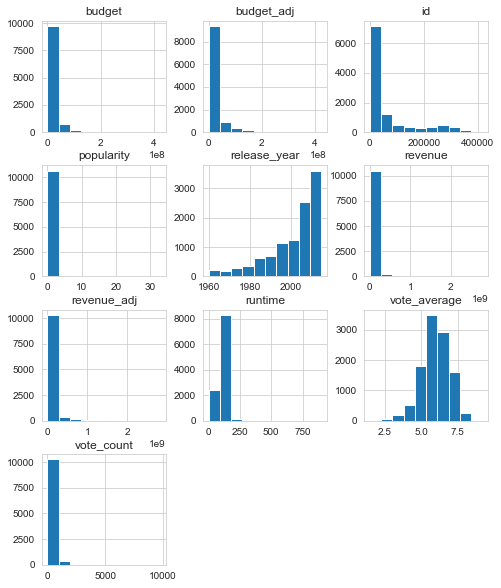

In [229]:
#check histogram
df.hist(figsize=(8,10))

>Many variables are skewed to the right. For example, it can be seen that the number of movies released increases over time. Additionally, on the variable vote_average (rating) the score that has been most often awarded is 6 points.

### Data Cleaning: duplication,missing value and data manipulation
>The data set was examined for any duplications.

In [230]:
#check any duplications
df.duplicated().sum()

1

In [231]:
#investigate the duplicated data
duplication = df[df.duplicated(keep=False)]

In [232]:
duplication

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> As these data entries are exactly the same, I  decided to drop one of them.

In [233]:
#drop duplicated
df.drop_duplicates(inplace=True)

In [234]:
#confim change in the dataset
df.shape

(10865, 21)

>Next I examined for any missing values and data types.

In [235]:
#find data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

>There are missing values in the columns imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companis. Initially, columns which are not relevant for this analysis have been dropped. 

In [236]:
#dop some columns from the data set
drop_col =['id','imdb_id','homepage','tagline','overview']
df.drop(drop_col,axis=1,inplace = True)
df.shape

(10865, 16)

>After removing 5 columns, I looked into the missing value and 0 value data.

In [237]:
#check if they are really 0 revenue movies
df[df.revenue==0].head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


In [238]:
#check if they are really 0 budget movies
df[df.budget==0].head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,sword|magic|sorcery|necromancer|woman director,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,tattoo|high school|leukemia|friends|parody,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [239]:
#check if they are really 0 runtime movies
df[df.runtime==0].head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,tattoo|tattooing,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
445,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,NaN,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.0,0.0
486,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,woman director,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.0,0.0


>After doing a google search on the movies listed above, it was evident, that they have   missing values in this data set. For example, “Mr.Holmes”'s budget is noted as 10 million USD on Google. Therefore, the missing value is replacedwith “na”.

In [240]:
#create a list with 0 value
col_name = ['budget','revenue','runtime','budget_adj','revenue_adj']

In [241]:
#replace 0 with na
df[col_name] = df[col_name].replace(0,np.nan)

In [242]:
#check results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 1.4+ MB


In [243]:
#check data set without na
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 16 columns):
popularity              3677 non-null float64
budget                  3677 non-null float64
revenue                 3677 non-null float64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null object
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
budget_adj              3677 non-null float64
revenue_adj             3677 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 488.4+ KB


>As data is difficult to retrieve, I considered if I should fill in the values or drop rows. Removing all “na” would reduce the data set from 10865 movies to 3677 movies. As this is too much data loss, I decided to focus on the variables budget and revenue.

In [244]:
#check status with dropping na where both budget and revenue values are missing.
df.dropna(subset=['budget','revenue'],how='all').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 16 columns):
popularity              6164 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          6164 non-null object
cast                    6152 non-null object
director                6160 non-null object
keywords                5736 non-null object
runtime                 6161 non-null float64
genres                  6163 non-null object
production_companies    5978 non-null object
release_date            6164 non-null object
vote_count              6164 non-null int64
vote_average            6164 non-null float64
release_year            6164 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 818.7+ KB


In [245]:
#summary statistics of original data set to compare any differences
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [246]:
#summary statistics of data set without na in both budget and revenue columns.
df.dropna(subset=['budget','revenue'],how='all').describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6164.000000,5.169000e+03,4.849000e+03,6161.000000,6164.000000,6164.000000,6164.000000,5.169000e+03,4.849000e+03
mean,0.909417,3.073958e+07,8.923886e+07,106.505762,355.941110,6.039163,2000.984263,3.688907e+07,1.151009e+08
std,1.240855,3.890441e+07,1.620801e+08,23.041852,733.220129,0.872564,11.917284,4.196096e+07,1.988557e+08
min,0.001117,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.322289,6.000000e+06,7.732325e+06,93.000000,31.000000,5.500000,1994.000000,8.102293e+06,1.046585e+07
50%,0.570484,1.700000e+07,3.185308e+07,103.000000,95.500000,6.100000,2004.000000,2.271505e+07,4.395666e+07
75%,1.050621,4.000000e+07,9.996575e+07,116.000000,324.000000,6.600000,2010.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


>The summary statistics above show similar data between two data sets. Data having “na” in the both budget and revenue columns was dropped. Afterwards the columnsbudget, budegt_adj, revenue,reveue_adj were filled with the respective mean value.

In [247]:
# dropna
df.dropna(subset=['budget','revenue'],how='all',inplace=True)

In [248]:
#check results
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 16 columns):
popularity              6164 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          6164 non-null object
cast                    6152 non-null object
director                6160 non-null object
keywords                5736 non-null object
runtime                 6161 non-null float64
genres                  6163 non-null object
production_companies    5978 non-null object
release_date            6164 non-null object
vote_count              6164 non-null int64
vote_average            6164 non-null float64
release_year            6164 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 818.7+ KB


In [249]:
#check summary statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6164.000000,5.169000e+03,4.849000e+03,6161.000000,6164.000000,6164.000000,6164.000000,5.169000e+03,4.849000e+03
mean,0.909417,3.073958e+07,8.923886e+07,106.505762,355.941110,6.039163,2000.984263,3.688907e+07,1.151009e+08
std,1.240855,3.890441e+07,1.620801e+08,23.041852,733.220129,0.872564,11.917284,4.196096e+07,1.988557e+08
min,0.001117,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.322289,6.000000e+06,7.732325e+06,93.000000,31.000000,5.500000,1994.000000,8.102293e+06,1.046585e+07
50%,0.570484,1.700000e+07,3.185308e+07,103.000000,95.500000,6.100000,2004.000000,2.271505e+07,4.395666e+07
75%,1.050621,4.000000e+07,9.996575e+07,116.000000,324.000000,6.600000,2010.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [250]:
#use col_name variable which was created before to fill na variable with respective mean. #col_name = ['budget','revenue','runtime','budget_adj','revenue_adj']
df[col_name]=df[col_name].fillna(df[col_name].mean())

In [251]:
#check changes made above 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6164 entries, 0 to 10865
Data columns (total 16 columns):
popularity              6164 non-null float64
budget                  6164 non-null float64
revenue                 6164 non-null float64
original_title          6164 non-null object
cast                    6152 non-null object
director                6160 non-null object
keywords                5736 non-null object
runtime                 6164 non-null float64
genres                  6163 non-null object
production_companies    5978 non-null object
release_date            6164 non-null object
vote_count              6164 non-null int64
vote_average            6164 non-null float64
release_year            6164 non-null int64
budget_adj              6164 non-null float64
revenue_adj             6164 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 818.7+ KB


In [252]:
#check summary statistics again
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,6164.000000,6.164000e+03,6.164000e+03,6164.000000,6164.000000,6164.000000,6164.000000,6.164000e+03,6.164000e+03
mean,0.909417,3.073958e+07,8.923886e+07,106.505762,355.941110,6.039163,2000.984263,3.688907e+07,1.151009e+08
std,1.240855,3.562575e+07,1.437524e+08,23.036243,733.220129,0.872564,11.917284,3.842471e+07,1.763694e+08
min,0.001117,1.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.322289,8.000000e+06,1.262531e+07,93.000000,31.000000,5.500000,1994.000000,1.016400e+07,1.752074e+07
50%,0.570484,2.500000e+07,5.790389e+07,103.000000,95.500000,6.100000,2004.000000,3.042076e+07,7.911122e+07
75%,1.050621,3.300000e+07,8.923886e+07,116.000000,324.000000,6.600000,2010.000000,4.206450e+07,1.151009e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


>As can be seen above, there are no more missing values for budget, revenue, runtime, budget_adj and revenue_adj. I decided to take care of missing values on other string variable columns such as genres at a later time, if needed.

In [253]:
#change data type of release date from string to date.
df['release_date']=pd.to_datetime(df['release_date'])

>A new column for seasons was created, to be used at a later time.

In [254]:
# function to get seasons
def season(col):
    '''
    This function receives a month and returns respective seasons.
    '''
    if col < 3:
        return 'winter'
    elif col < 6:
        return 'spring'
    elif col < 9:
        return 'summer'
    elif col < 12:
        return 'autumn'
    else:
        return 'winter'

In [255]:
#apply the season function above
df['seasons'] = df['release_date'].dt.month.apply(season)

In [256]:
#reset index
df.reset_index(inplace=True,drop=True)

In [257]:
#check results
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,spring
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,spring
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,winter
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,spring


# <a id='eda'></a>
## Exploratory Data Analysis

> The data has been trimmed and cleaned. Next, I explored the data by computing statistics and creating visualizations with the goal of addressing the research questions.

### Research Question 1: Are there any differences in popularity over time?



>I decided to analyze the number of votes and average rating as they are likely related to popularity.

In [258]:
#average popularity over time
mean_popularity_y=df.groupby('release_year').popularity.mean()

In [259]:
#average vote counts over time
mean_vote_count_y = df.groupby('release_year').vote_count.mean()

In [260]:
#average rating over time
mean_movie_rate_y=df.groupby('release_year').vote_average.mean()

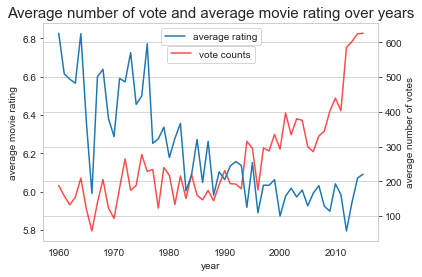

In [261]:
#relate 2 plots together
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(mean_movie_rate_y,linestyle='solid',label='average rating')
ax2.plot(mean_vote_count_y.index, mean_vote_count_y, color='r',alpha=0.7,label='vote counts')

# change zorder of graphs
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_alpha(0)

#legend
ax1.legend(loc='upper center')
ax2.legend(loc='upper center',bbox_to_anchor=(0.5,0.92))

#axis
ax1.set_xlabel('year')
ax1.set_ylabel('average movie rating')
ax2.set_ylabel('average number of votes')
#title
plt.title('Average number of vote and average movie rating over years',fontsize=15,fontweight=1)

ax1.grid(False)

>While average movie rating declines, the number of votes(rating) increases over time. As a next step, I examined the relationship between popularity and vote volume.

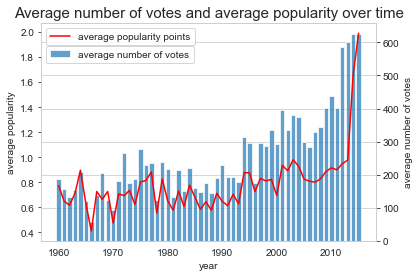

In [262]:
#relate 2 plots together
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

#create plots
ax1.plot(mean_popularity_y,color="r",linestyle='solid',label='average popularity points')
ax2.bar(mean_vote_count_y.index, mean_vote_count_y, alpha=0.7,label='average number of votes')

#change zorder of graph
ax1.set_zorder(2)
ax2.set_zorder(1)
ax1.patch.set_alpha(0)

#legend
ax1.legend()
ax2.legend(bbox_to_anchor=(0.47,0.92))

#axis
ax1.set_xlabel('year')
ax1.set_ylabel('average popularity')
ax2.set_ylabel('average number of votes')
#title
plt.title('Average number of votes and average popularity over time',fontsize=15,fontweight=1)

#remove grid for ax1
ax1.grid(False)

> It can be seen that the popularity tends to increase over time. One point to note is that popularity boosts after 2013. To find out the reason for this, I further analysed the data from around 2013.


In [263]:
#check mean of vote counts and average rating around 2013
df.groupby('release_year')[['popularity','vote_count','vote_average']].mean().loc[2011:]

,popularity,vote_count,vote_average
release_year,,,
2011,0.900032,402.771875,5.984687
2012,0.947749,585.619048,5.795918
2013,0.977502,602.535714,5.945238
2014,1.659155,624.377926,6.071572
2015,1.990101,626.135338,6.092105


> Even though vote_count and vote_average are stable with showing a slight increase tendency, it still shows much higher popularity. Therefore, there must have been some changes in measurements. According to https://www.themoviedb.org/talk/5141d424760ee34da71431b0, "Unique views on the website but improved with taking in account the number of ratings a movie received...", showing that the number of votes plays an important role after 2013 alongside with others. I examined the correlation between number of votes and popularity.

In [264]:
#check correlation
#standard diviation
std_popularity = df.popularity.std(ddof=0)
std_vote_count = df.vote_count.std(ddof=0)

#mean
mean_popularity = df.popularity.mean()
mean_vote_count = df.vote_count.mean()

#standardization
standardized_popularity = (df.popularity-mean_popularity)/std_popularity
standardized_vote_count = (df.vote_count-mean_vote_count)/std_vote_count

#peason's r

pearson = np.corrcoef(standardized_popularity,standardized_vote_count)[0,1]
print('R:{}'.format(pearson))

R:0.7948649459139363


Text(0, 0.5, 'popularity')

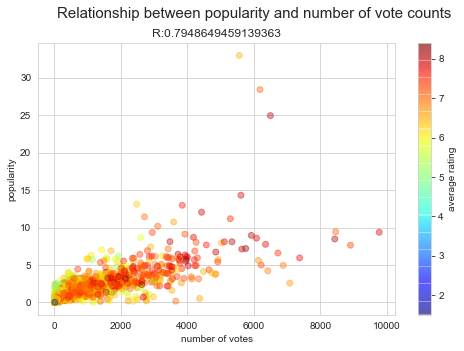

In [265]:
#plot size
plt.figure(figsize=(8,5))
#plot + set color for a color bar
plt.scatter(df['vote_count'],df['popularity'],c=df['vote_average'],alpha=0.4,cmap='jet')
#add color bar with average rating
plt.colorbar(label='average rating')
#title
plt.title('R:{}'.format(pearson))
plt.suptitle('Relationship between popularity and number of vote counts',ha='center',fontsize=15,fontweight=1)

#axis
plt.xlabel('number of votes')
plt.ylabel('popularity')



>Pearson's r showed that there is positive correlation between popularity and number of votes. It can be said that there is a high possibility that number of votes are related to popularity of movies. Following this I examined if there are any differences in popularity between seasons.

In [266]:
#get only average popularity per seasons
seasonal_popularity = df.groupby('seasons').mean().popularity

Text(0.5, 0, 'seasons')

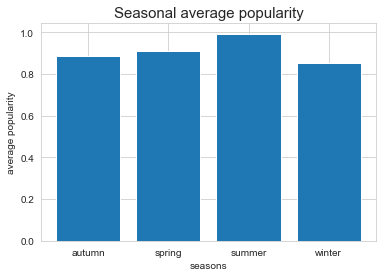

In [267]:
#plot, change to million
plt.bar(seasonal_popularity.index,seasonal_popularity)
#title
plt.title('Seasonal average popularity',fontsize=15,fontweight=1)
#axis
plt.ylabel('average popularity')
plt.xlabel('seasons')

>To summarize, it can be said that there is a relationship between the number of vote(rating) and popularity. And the popularity of movies increases over time. Furthermore, movies released in the summertime show a slightly higher popularity.


### Research Question 2: Are high budget movies popular?
>I analyzed if expensive movies tend to be popular or not. The Variable adjusted budget was used to remove an inflation factor.

In [268]:
#check correlation
#standard diviation
#std_popularity = df.popularity.std(ddof=0) *we have already calculated this before.
std_budget = df.budget_adj.std(ddof=0)

#mean
#mean_popularity = df.popularity.mean()
mean_budget = df.budget_adj.mean()

#standardized
#standardized_popularity = (df.popularity-mean_popularity)/std_popularity
standardized_budget = (df.budget_adj-mean_budget)/std_budget

#peason's r

pearson_bud = np.corrcoef(standardized_popularity,standardized_budget)[0,1]
print('R:{}'.format(pearson_bud))

R:0.4270508321998315


Text(0, 0.5, 'popularity')

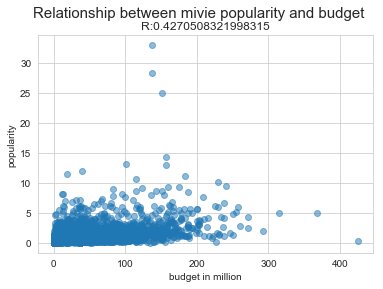

In [269]:
#plot
plt.scatter(df['budget_adj']/10**6,df['popularity'],alpha=0.5)

#title
plt.suptitle('Relationship between mivie popularity and budget ',fontsize=15,fontweight=1)
plt.title('R:{}'.format(pearson_bud))
#axis
plt.xlabel('budget in million')
plt.ylabel('popularity')

>The results show a weak positive correlation between movie popularity and budget. Therefore, it cannot be definitely said that expensive movies tend to be popular.

### Research Question 3: What are the most popular, expensive, revenue-generating and profitable movies?

In [270]:
#To get the most profitable movies, a new column is needed. We will also use adjusted value.
df['profit'] = df['revenue_adj']-df['budget_adj']

In [271]:
df.profit.describe()

count    6.164000e+03
mean     7.821182e+07
std      1.596042e+08
min     -4.139124e+08
25%     -4.120967e+06
50%      4.059024e+07
75%      1.093287e+08
max      2.750137e+09
Name: profit, dtype: float64

>As can be seen from the data, at least 25% of movies are actually not profitable.

In [272]:
#most popular movie
pop_max_pos=df['popularity'].idxmax()
df.iloc[[pop_max_pos]]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09


>“Jurassic World” is the most popular movie in this data set.

In [273]:
#most expensive movie
bud_max_pos=df['budget_adj'].idxmax()
df.iloc[[bud_max_pos]]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
1106,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,winter,-413912431.0


>“The Warrior's Way” is the most expensive movie in this data set and it generated negative profit.

In [274]:
#most revenue generated movie
rev_max_pos=df['revenue_adj'].idxmax()
df.iloc[[rev_max_pos]]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
597,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,winter,2.586237e+09


> "Avatar" is the most revenue generating movie in this data set.

In [275]:
#most profitable movie
prof_max_pos=df['profit'].idxmax()
df.iloc[[prof_max_pos]]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
565,12.037933,11000000.0,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,spring,2.750137e+09


>"Star Wars" is the most profitable movie in this data set.

### Research Question 4: What kind of movie genres are popular?
>Lastly I looked into what kind of movie genres are popular.

In [276]:
#copy the original data frame
genre_df = df.copy()

In [277]:
#check the data frame
genre_df['genres'].head(1)

0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

>There are several genres separated with '|' within a row. These were separated.

In [278]:
#split rows and return the result on new columns
genre_df=genre_df.genres.str.split("|",expand=True)

In [279]:
#create new column name
#get number of columns
col_num = np.arange(len(genre_df.columns))
#create empty list
new_col =[]
# get new column name
for i in col_num:
    new_col.append("genre_{}".format(i+1))

In [280]:
#rename columns with new one
genre_df.columns=new_col

In [281]:
#check results
genre_df.head(5)

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [282]:
#merge genre_df with original data frame
new_genre_df = df.merge(genre_df,left_index=True,right_index=True,how='left')

In [283]:
#check the new data frame
new_genre_df.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,release_year,budget_adj,revenue_adj,seasons,profit,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,2015,1.379999e+08,3.481613e+08,spring,2.101614e+08,Action,Adventure,Science Fiction,Thriller,None


In [284]:
#check colomun number
new_genre_df.shape

(6164, 23)

In [285]:
#drop original genre column as we do not need it anymore
new_genre_df.drop(['genres'],inplace=True,axis=1)

In [286]:
#check results
new_genre_df.shape

(6164, 22)

In [287]:
#create a new data frame as a reference
genre_df_ref = new_genre_df.copy()

In [288]:
#remove columns except for title and genres
genre_df_ref = genre_df_ref[['original_title','genre_1','genre_2','genre_3','genre_4','genre_5']]

In [289]:
#check
genre_df_ref.head()

,original_title,genre_1,genre_2,genre_3,genre_4,genre_5
0,Jurassic World,Action,Adventure,Science Fiction,Thriller,None
1,Mad Max: Fury Road,Action,Adventure,Science Fiction,Thriller,None
2,Insurgent,Adventure,Science Fiction,Thriller,None,None
3,Star Wars: The Force Awakens,Action,Adventure,Science Fiction,Fantasy,None
4,Furious 7,Action,Crime,Thriller,None,None


In [290]:
# melt to reshape the data frame so that each row has only one genre 
genre_df_ref = genre_df_ref.melt(id_vars=['original_title'],value_name='genres')

In [291]:
# check results
genre_df_ref.query('original_title=="Jurassic World"')

,original_title,variable,genres
0,Jurassic World,genre_1,Action
6164,Jurassic World,genre_2,Adventure
12328,Jurassic World,genre_3,Science Fiction
18492,Jurassic World,genre_4,Thriller
24656,Jurassic World,genre_5,None


In [292]:
#check col and row number
genre_df_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30820 entries, 0 to 30819
Data columns (total 3 columns):
original_title    30820 non-null object
variable          30820 non-null object
genres            15962 non-null object
dtypes: object(3)
memory usage: 722.4+ KB


>In addition, there are some missing values which were dropped. 

In [293]:
#drop na
genre_df_ref.dropna(inplace=True)

In [294]:
#check results
genre_df_ref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15962 entries, 0 to 30815
Data columns (total 3 columns):
original_title    15962 non-null object
variable          15962 non-null object
genres            15962 non-null object
dtypes: object(3)
memory usage: 498.8+ KB


In [295]:
#check results with a specific movie title
genre_df_ref.query('original_title=="Jurassic World"')

,original_title,variable,genres
0,Jurassic World,genre_1,Action
6164,Jurassic World,genre_2,Adventure
12328,Jurassic World,genre_3,Science Fiction
18492,Jurassic World,genre_4,Thriller


> The reshaped data frame was merged with the original data frame to obtain information of each movie.

In [296]:
#merge the reshaped data frame with the original using titles.
new_genre_df = genre_df_ref.merge(df,on='original_title',how='left')

In [297]:
#check results
new_genre_df.query('original_title=="Jurassic World"')

,original_title,variable,genres_x,popularity,budget,revenue,cast,director,keywords,runtime,genres_y,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
0,Jurassic World,genre_1,Action,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09
6387,Jurassic World,genre_2,Adventure,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09
11626,Jurassic World,genre_3,Science Fiction,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09
14887,Jurassic World,genre_4,Thriller,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09


In [298]:
#check count of genres
new_genre_df.groupby('genres_x').count().original_title.sort_values(ascending=False)

genres_x
Drama              2917
Comedy             2199
Thriller           1945
Action             1679
Romance            1100
Adventure          1046
Crime               979
Horror              925
Science Fiction     799
Family              631
Fantasy             594
Mystery             529
Animation           302
Music               227
History             212
War                 178
Documentary         134
Western              89
Foreign              53
TV Movie              9
Name: original_title, dtype: int64

>It can be seen that the highest amount of movies in this data set belong to the genre “drama” . Next, I examined what kind of genres are popular.

In [299]:
# popular_data_set * we define popular movies as movies wihich receive popularity rating with its above average.
popular = df.query('popularity >={}'.format(df.popularity.mean()))

In [300]:
#get popular movie titles
pupular_title=popular.original_title.unique()

In [301]:
# select only popular titles
new_genre_df[new_genre_df.original_title.isin(pupular_title)].head()

,original_title,variable,genres_x,popularity,budget,revenue,cast,director,keywords,runtime,genres_y,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
0,Jurassic World,genre_1,Action,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09
1,Mad Max: Fury Road,genre_1,Action,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,spring,2.101614e+08
2,Insurgent,genre_1,Adventure,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,spring,1.704191e+08
3,Star Wars: The Force Awakens,genre_1,Action,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,winter,1.718723e+09
4,Furious 7,genre_1,Action,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,spring,1.210949e+09


In [302]:
#check average popularity of movie genres
pop_genre=new_genre_df.groupby('genres_x').mean().popularity.sort_values(ascending=True)

Text(0, 0.5, 'movie genres')

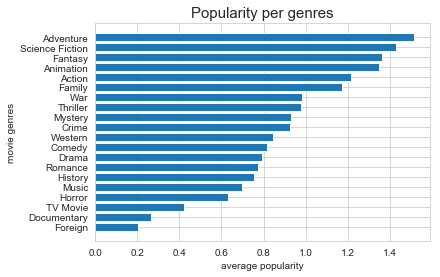

In [303]:
# bar chart
plt.barh(pop_genre.index, pop_genre)
#title
plt.title('Popularity per genres',fontsize=15,fontweight=1)
#axis
plt.xlabel('average popularity')
plt.ylabel('movie genres')

> Results show that adventure, science fiction, fantasy and animation movies are the most popular. Lastly I examined which genres generate the most profit.

In [304]:
# profit_data_set * we define profitable movies as movies wihich generate profits with its above average.
profit = df.query('profit >={}'.format(df.profit.mean()))

In [305]:
#get profitable movie title
profitable_title=profit.original_title.unique()

In [306]:
# select only profitable titles
new_genre_df[new_genre_df.original_title.isin(profitable_title)].head()

,original_title,variable,genres_x,popularity,budget,revenue,cast,director,keywords,runtime,genres_y,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,seasons,profit
0,Jurassic World,genre_1,Action,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer,1.254446e+09
1,Mad Max: Fury Road,genre_1,Action,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,spring,2.101614e+08
2,Insurgent,genre_1,Adventure,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,spring,1.704191e+08
3,Star Wars: The Force Awakens,genre_1,Action,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,winter,1.718723e+09
4,Furious 7,genre_1,Action,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,spring,1.210949e+09


In [307]:
#create a data with average profitability of movie genres
prof_genre=new_genre_df.groupby('genres_x').mean().profit.sort_values(ascending=True)

Text(0, 0.5, 'movie genres')

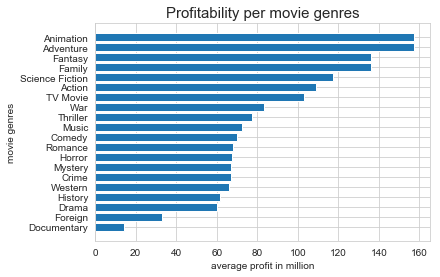

In [308]:
#bar chart
plt.barh(prof_genre.index, prof_genre/10**6)
#title
plt.title('Profitability per movie genres',fontsize=15,fontweight=1)
#axis
plt.xlabel('average profit in million')
plt.ylabel('movie genres')

>Animation is the most profitable movie genre. While Science Fiction is one of the most popular movie genres, it is less profitable than adventure or fantasy movies which are generally as popular as Science Fiction movies.

<a id='conclusions'></a>
## Conclusions

>It can be said that there is a possible relationship between number of vote(rating) and popularity of movie in the data set. However, it needs to be highlighted that the popularity measurement changed after 2013. Popularity of movies tends to increase overtime and shows slightly higher popularity in summer.<p></p>

>Higher budget movies are not necessarily popular and at least 25% of movies are not profitable. Jurassic World is the most popular movie, The Warrior's Way is the highest budget movie, Avatar is the most revenue generating movie and Star Wars is the most profitable movie between 1960 and 2015. Adventure, science fiction, fantasy and animation movies are most popular genres and animation is the most profitable genre.<p></p>

>Limitation: There was measurement change for popularity as well as we cleaned up more than 40% of data due to missing values. <p></p>

#### Reference:
<ul>
    <li><a href=https://jakevdp.github.io/PythonDataScienceHandbook/> Python Data Science Handbook by Jake VanderPlas</a></li>
    <li><a href=http://bicycle1885.hatenablog.com/entry/2014/02/14/023734/> りんごがでている (matplotlib related online article)</a></li>
</ul>